In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve,plot_roc_curve, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve


In [2]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier=None, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('x', 'o', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if classifier:
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=np.array([cmap(idx)]),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

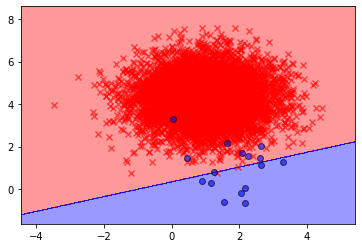

In [3]:
X, y = make_blobs(n_samples=[20000,50], random_state=0)
# X, y = make_blobs(n_samples=[20000,100], random_state=0)
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr.fit(X_train, y_train)
plot_decision_regions(X_test, y_test,lr)

o 當作正樣本 x當作負樣本

# 準確度(Accuracy)

In [4]:
lr.score(X_test, y_test)

0.9984887411213541

In [5]:
confusion_matrix(lr.predict(X_test), y_test)

array([[6599,    8],
       [   2,    8]])

In [6]:
print(classification_report(lr.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6607
           1       0.50      0.80      0.62        10

    accuracy                           1.00      6617
   macro avg       0.75      0.90      0.81      6617
weighted avg       1.00      1.00      1.00      6617



# TF, FP, FN, TN

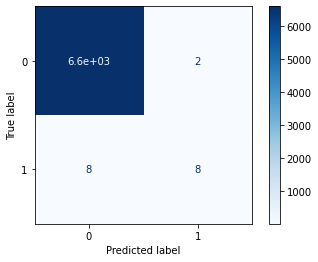

In [7]:
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues)

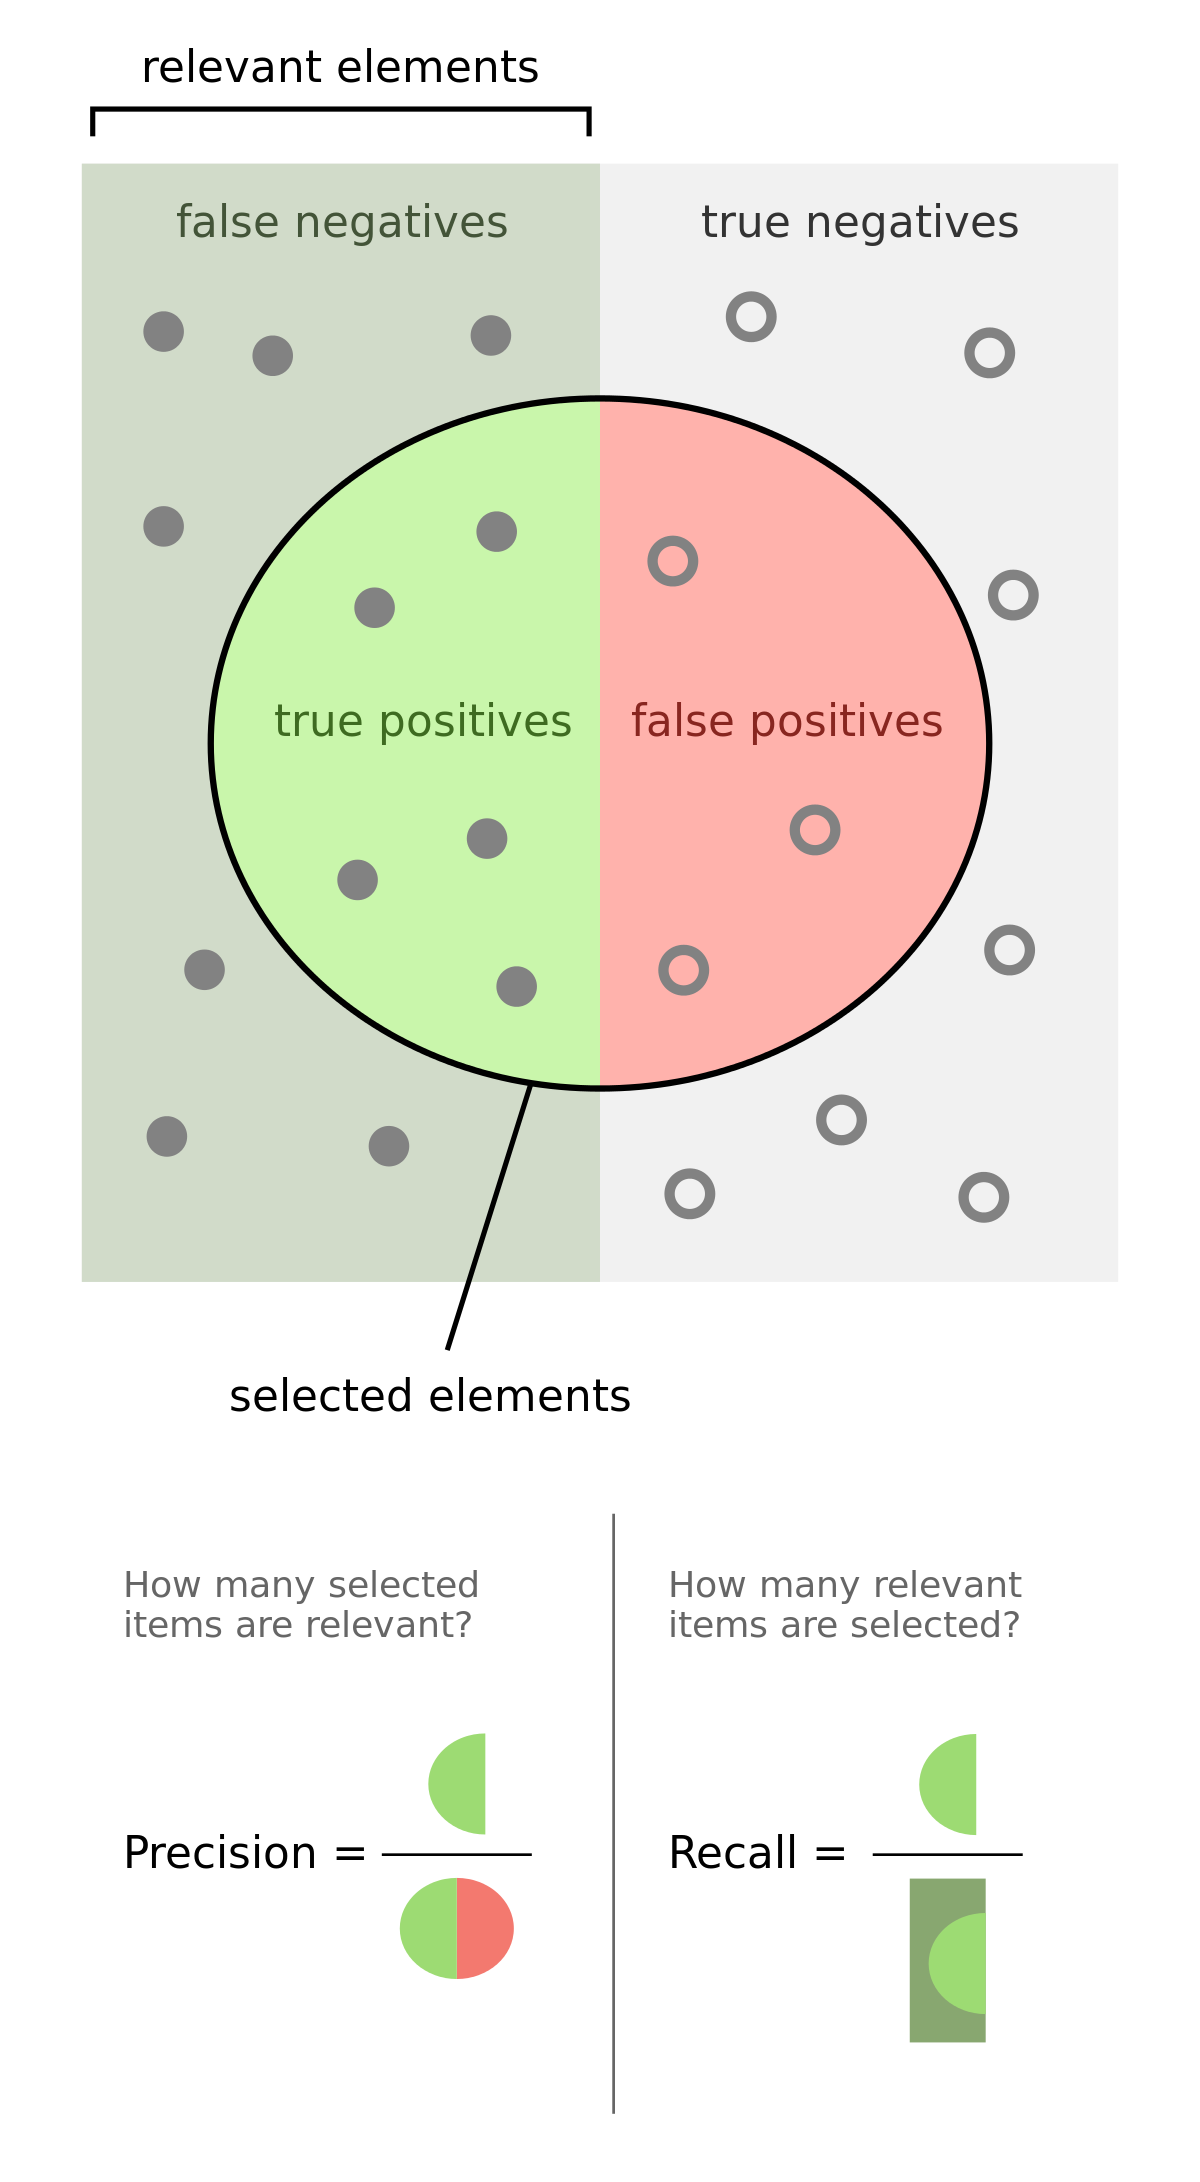

# 精準度(Precision)

In [8]:
precision_score(lr.predict(X_test),y_test)

0.5

# 召回率(Recall)

In [9]:
recall_score(lr.predict(X_test),y_test)

0.8

# F1 Score

F1 = 2 * (precision * recall) / (precision + recall) 
範圍0~1之間
假設p和r一個是1.0一個是0.1,算術平均會接近0.5 而調和平均接近0.2，這說明調和平均會強調兩者的一致性，明顯不一致時傾向於小的值，這更符合人們的直觀感受。

In [10]:
f1_score(lr.predict(X_test),y_test)

0.6153846153846154

# PR-curve

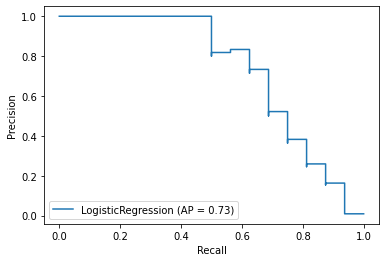

In [11]:
plot_precision_recall_curve(lr,X_test,y_test)

# ROC-AUC curve

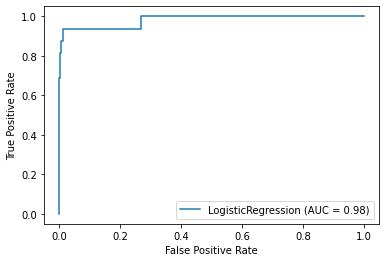

In [12]:
# 參考 https://zhuanlan.zhihu.com/p/31256633
plot_roc_curve(lr,X_test,y_test)

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1], pos_label=1)
np.around(fpr,decimals=3)
np.around(tpr,decimals=3)
np.around(thresholds,decimals=3)


array([0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001, 0.002, 0.002,
       0.003, 0.003, 0.006, 0.006, 0.012, 0.012, 0.268, 0.268, 1.   ])

array([0.   , 0.062, 0.5  , 0.5  , 0.625, 0.625, 0.688, 0.688, 0.75 ,
       0.75 , 0.812, 0.812, 0.875, 0.875, 0.938, 0.938, 1.   , 1.   ])

array([1.998, 0.998, 0.611, 0.504, 0.313, 0.212, 0.183, 0.106, 0.098,
       0.065, 0.06 , 0.03 , 0.03 , 0.012, 0.012, 0.   , 0.   , 0.   ])

## 正例調整為500個

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

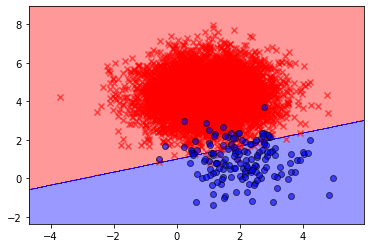

In [14]:
X, y = make_blobs(n_samples=[20000,500], random_state=0)
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lr.fit(X_train, y_train)
plot_decision_regions(X_test, y_test,lr)

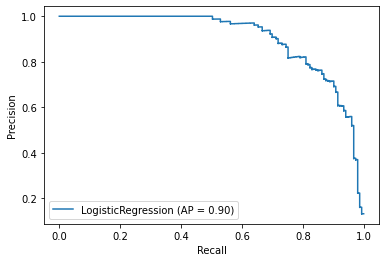

In [15]:
plot_precision_recall_curve(lr,X_test,y_test)

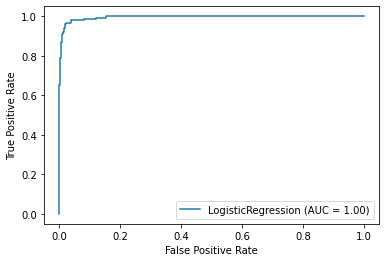

In [16]:
plot_roc_curve(lr,X_test,y_test)

# 多元分類

In [17]:
X, y = make_blobs(n_samples=[20000,1000,500], random_state=0)

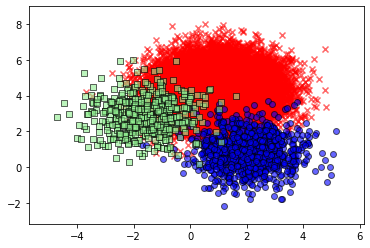

In [18]:
plot_decision_regions(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

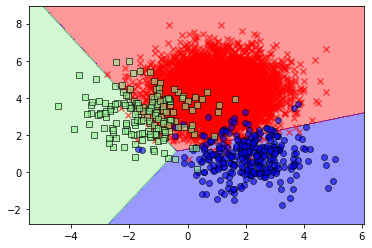

In [19]:
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lr.fit(X_train, y_train)
plot_decision_regions(X_test, y_test,lr)

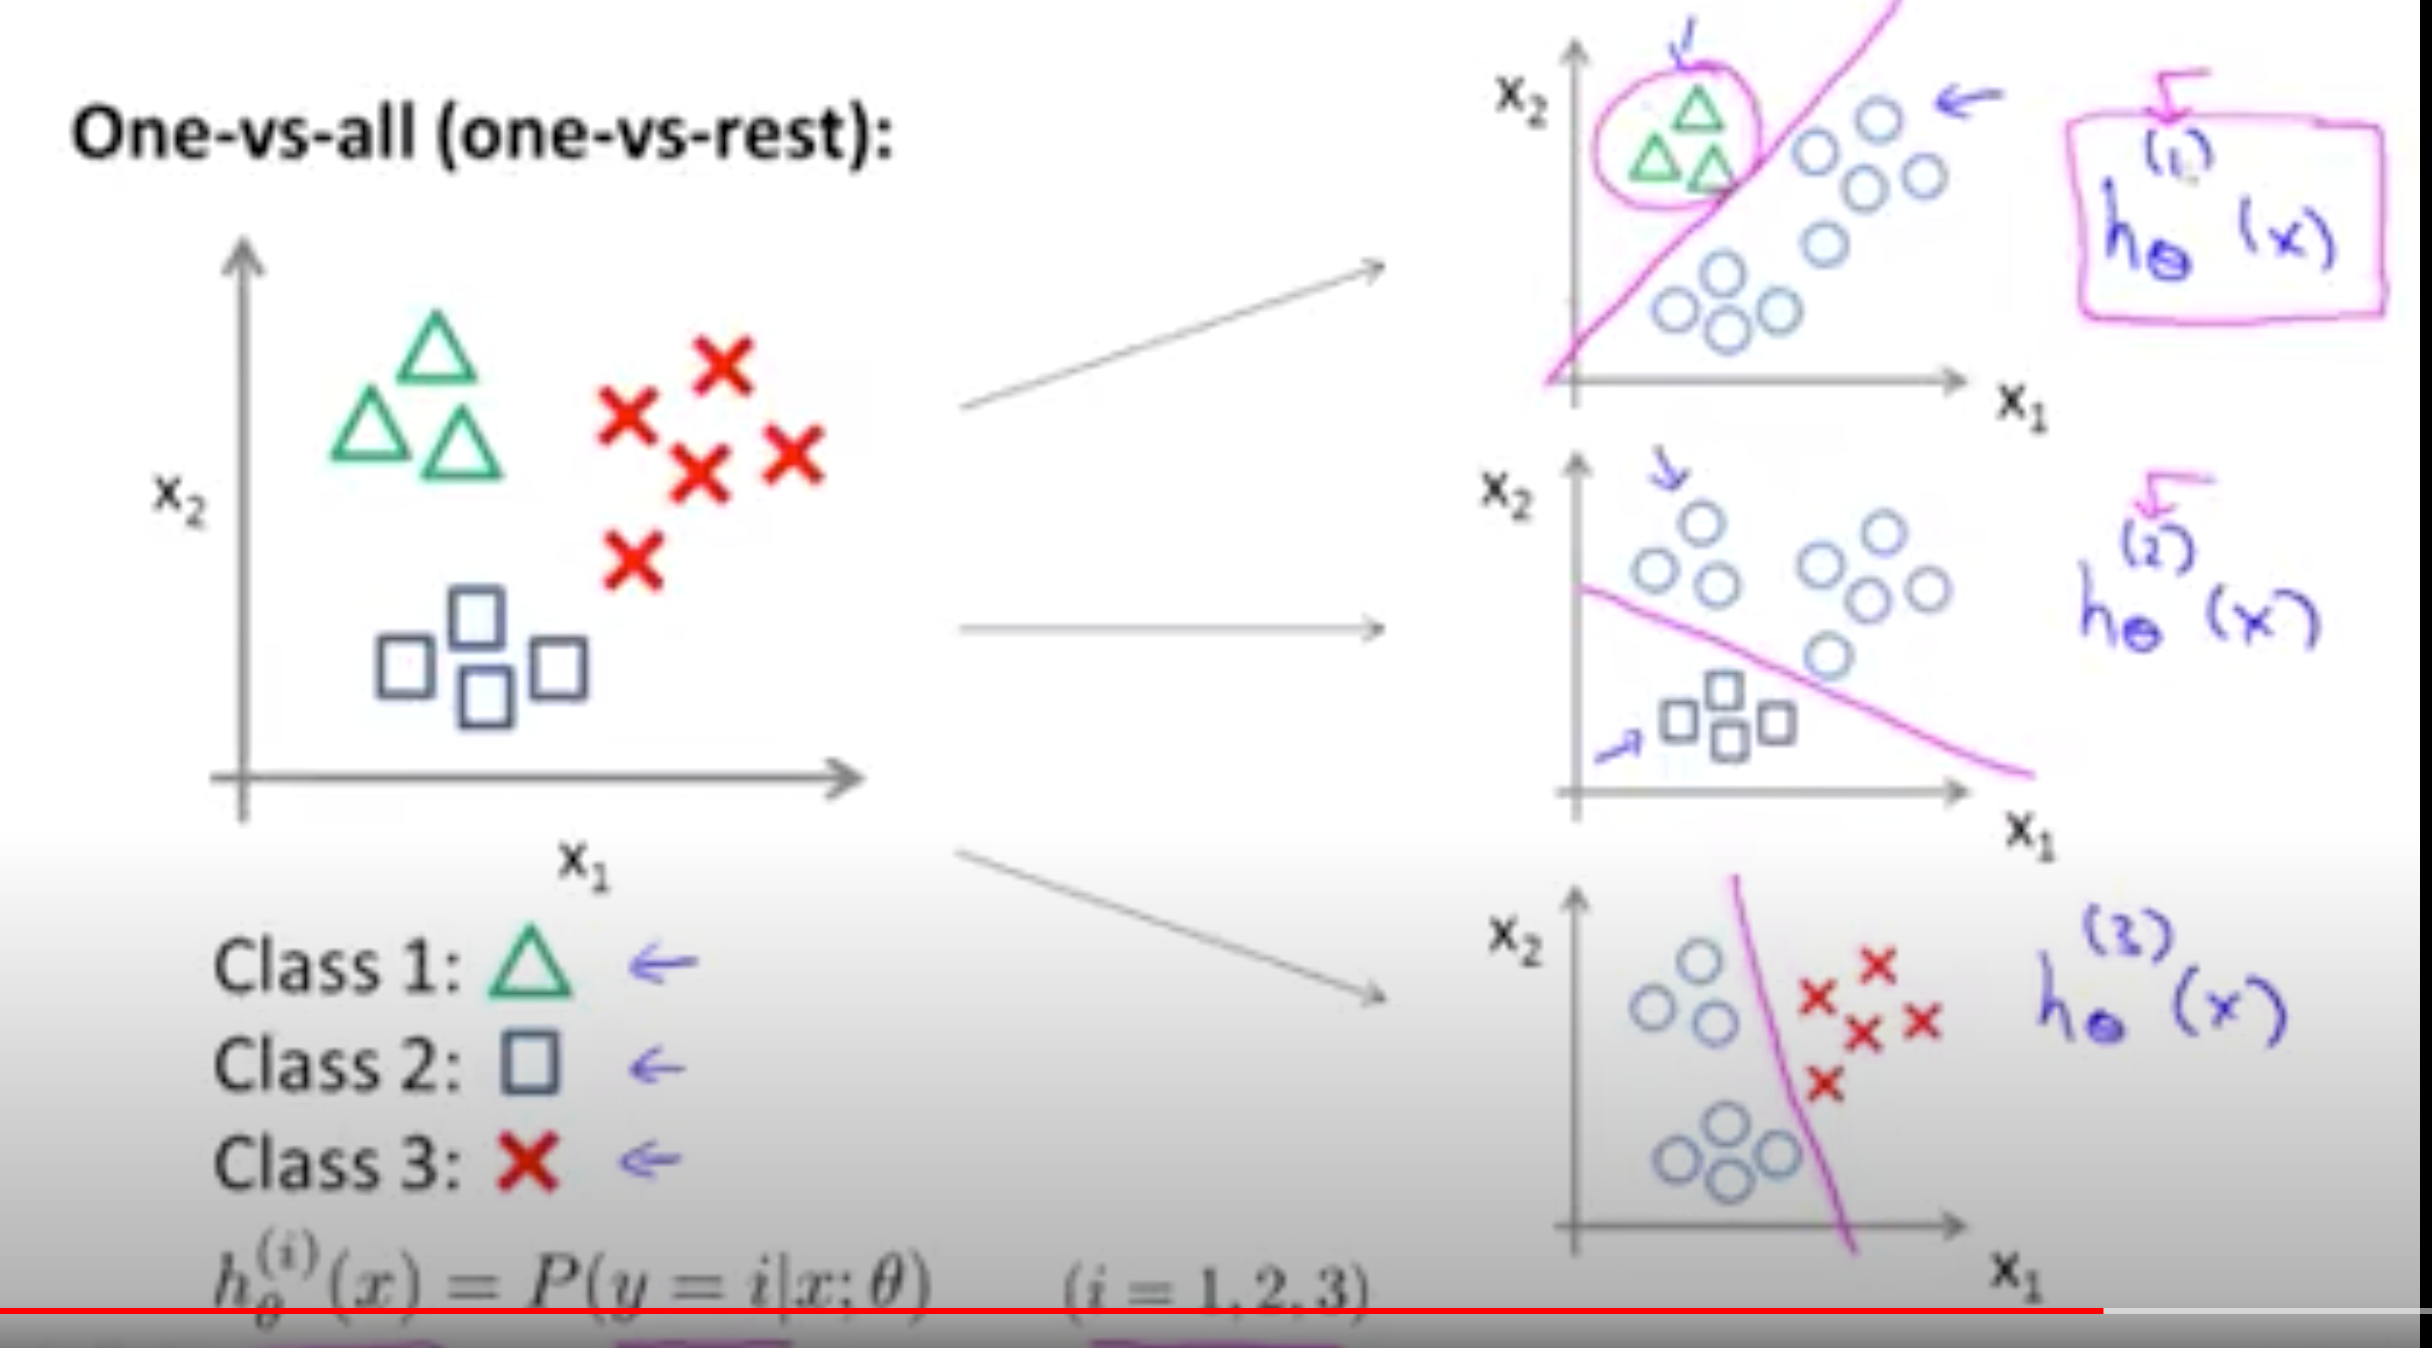

In [20]:
print(classification_report(lr.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6700
           1       0.86      0.88      0.87       304
           2       0.44      0.82      0.58        91

    accuracy                           0.97      7095
   macro avg       0.77      0.89      0.81      7095
weighted avg       0.98      0.97      0.98      7095

